# Treadmills Presentation Notebook

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [126]:
# Load the dataset
df = pd.read_csv('CardioGoodFitness.csv')

# Display the first few rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


<Axes: ylabel='Frequency'>

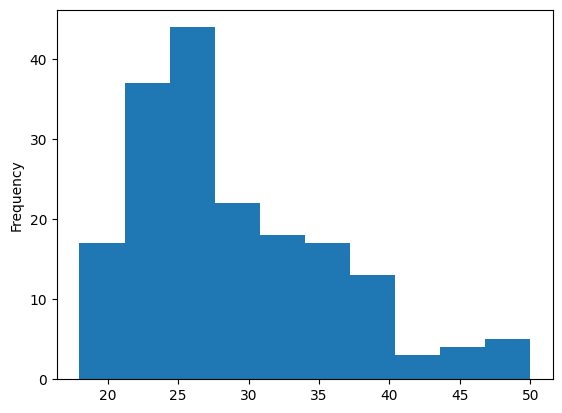

In [127]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

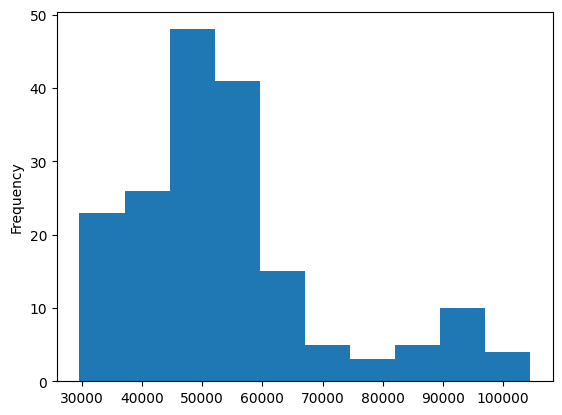

In [128]:
df['Income'].plot(kind='hist')

In [75]:
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
44,TM195,28,Female,14,Partnered,2,3,46617,56
94,TM498,24,Female,14,Single,3,2,40932,85
49,TM195,28,Female,16,Partnered,3,3,51165,56
124,TM498,33,Female,18,Single,3,4,47754,74
105,TM498,25,Male,16,Partnered,2,3,50028,53


In [131]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by 'Product' and calculate the mean for numeric columns
mean_df = df.groupby('Product')[numeric_columns].mean()

# Display the result
mean_df

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [132]:
# TM798 higher end model, more money, more education, more usage, a lot

In [133]:
df['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

In [134]:
counts_df = df['Product'].value_counts().to_frame(name='Sales')
counts_df

,Sales
Product,
TM195,80
TM498,60
TM798,40


<Axes: xlabel='Product', ylabel='Income'>

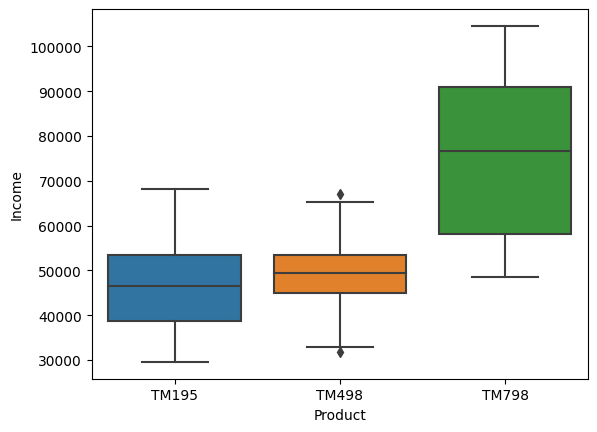

In [135]:
sns.boxplot(data = df, y = 'Income', x = 'Product')

In [138]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [139]:
male = df[df['Gender']=='Male']
male['Product'].value_counts()

Product
TM195    40
TM798    33
TM498    31
Name: count, dtype: int64

In [141]:
female = df[df['Gender']=='Female']
female['Product'].value_counts()

Product
TM195    40
TM498    29
TM798     7
Name: count, dtype: int64

In [137]:
print(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [142]:
male['Income'].mean()

56562.75961538462

In [143]:
female['Income'].mean()

49828.90789473684

In [144]:
male[male['Product']=='TM798']['Income'].describe()

count        33.000000
mean      75825.030303
std       18675.002521
min       48556.000000
25%       58516.000000
50%       77191.000000
75%       90886.000000
max      104581.000000
Name: Income, dtype: float64

In [87]:
df[df['MaritalStatus']=='Single']['Product'].value_counts()

Product
TM195    32
TM498    24
TM798    17
Name: count, dtype: int64

In [88]:
df[df['MaritalStatus']=='Partnered']['Product'].value_counts()

Product
TM195    48
TM498    36
TM798    23
Name: count, dtype: int64

In [91]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [92]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [93]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<Axes: xlabel='Product', ylabel='count'>

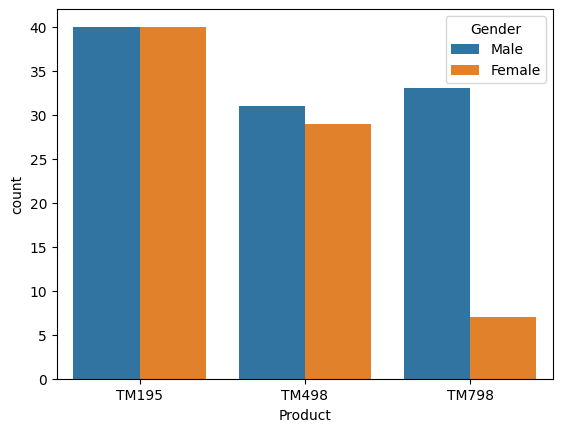

In [94]:
sns.countplot(x='Product', hue='Gender', data=df)

<Axes: xlabel='Fitness', ylabel='Miles'>

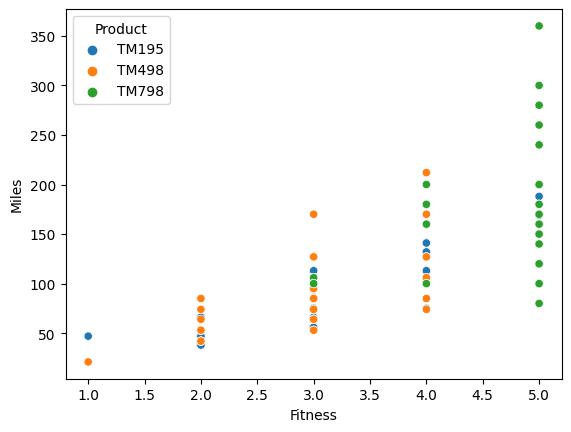

In [95]:
sns.scatterplot(x='Fitness', y='Miles', hue='Product', data=df)

<Axes: xlabel='Age', ylabel='Fitness'>

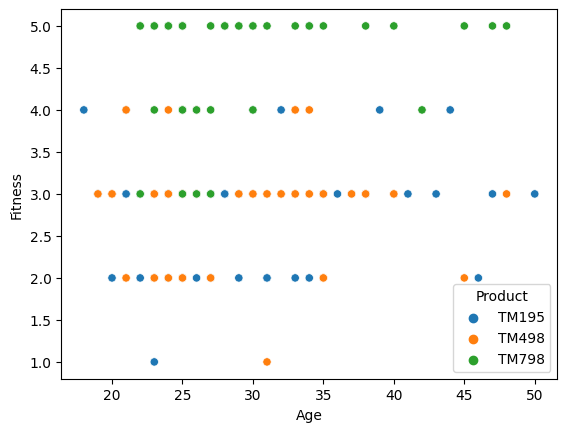

In [96]:
sns.scatterplot(x='Age', y='Fitness', hue='Product', data=df)

In [148]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

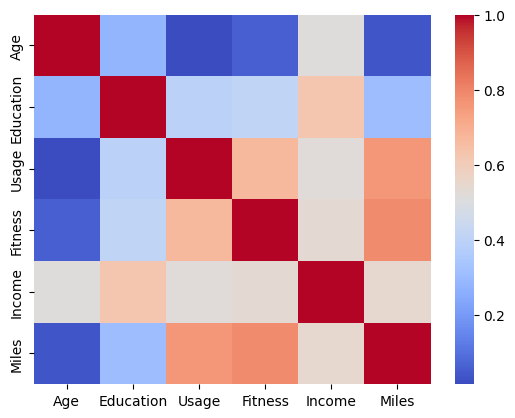

In [149]:
sns.heatmap(data = correlation_matrix, cmap = 'coolwarm')

<Figure size 1000x600 with 0 Axes>

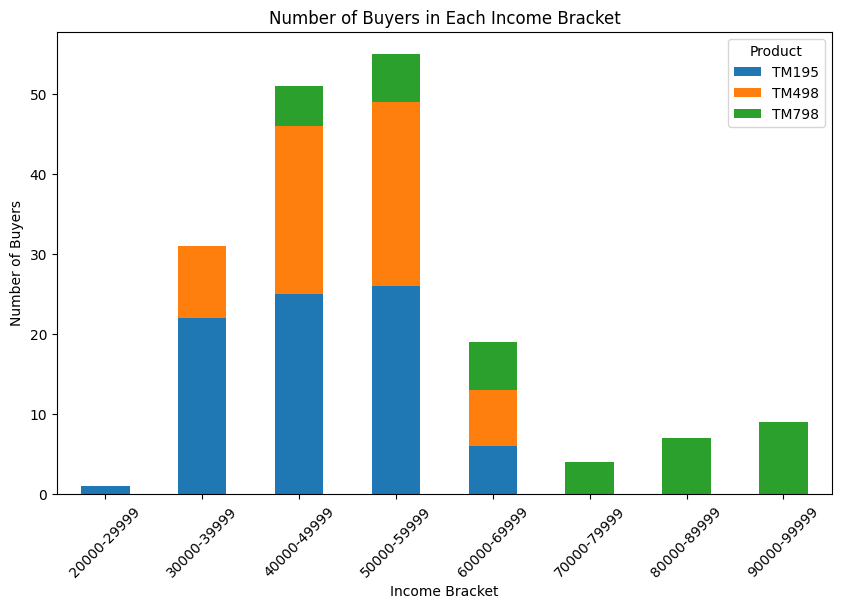

In [150]:
# Extension of Lorin's graph just with the added Hue on product
import matplotlib.pyplot as plt
bins = range(0, 100001, 10000)
labels = [f'{i}-{i+9999}' for i in bins[:-1]]

df['income_bracket'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

income_bracket_counts = df['income_bracket'].value_counts().sort_index()
income_product_crosstab = pd.crosstab(df['income_bracket'], df['Product'])
plt.figure(figsize=(10, 6))
income_product_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Income Bracket')
plt.ylabel('Number of Buyers')
plt.title('Number of Buyers in Each Income Bracket')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Education', ylabel='count'>

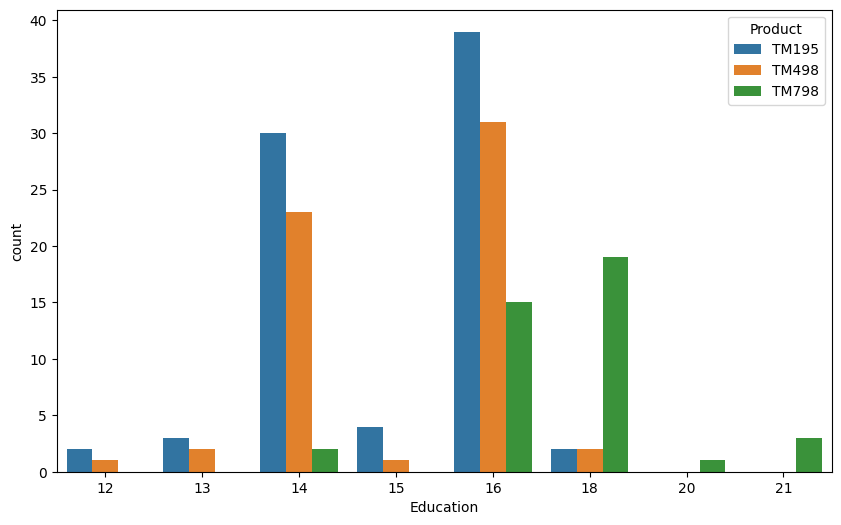

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Product', data=df)

In [100]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

categorical_features = ['Gender', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,Product,Age,Education,Usage,Fitness,Income,Miles,income_bracket,Gender_Male,MaritalStatus_Single
0,TM195,18,14,3,4,29562,112,20000-29999,True,True
1,TM195,19,15,2,3,31836,75,30000-39999,True,True
2,TM195,19,14,4,3,30699,66,30000-39999,False,False
3,TM195,19,12,3,3,32973,85,30000-39999,True,True
4,TM195,20,13,4,2,35247,47,30000-39999,True,False
...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,21,6,5,83416,200,80000-89999,True,True
176,TM798,42,18,5,4,89641,200,80000-89999,True,True
177,TM798,45,16,5,5,90886,160,90000-99999,True,True
178,TM798,47,18,4,5,104581,120,NaN,True,False


In [101]:
df = df.drop('income_bracket', axis = 1)
df

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Single
0,TM195,18,14,3,4,29562,112,True,True
1,TM195,19,15,2,3,31836,75,True,True
2,TM195,19,14,4,3,30699,66,False,False
3,TM195,19,12,3,3,32973,85,True,True
4,TM195,20,13,4,2,35247,47,True,False
...,...,...,...,...,...,...,...,...,...
175,TM798,40,21,6,5,83416,200,True,True
176,TM798,42,18,5,4,89641,200,True,True
177,TM798,45,16,5,5,90886,160,True,True
178,TM798,47,18,4,5,104581,120,True,False


In [102]:
df['Product'] = df['Product'].astype('category')

In [103]:
X = df.drop('Product', axis=1)
y = df['Product']

<Axes: xlabel='Age', ylabel='count'>

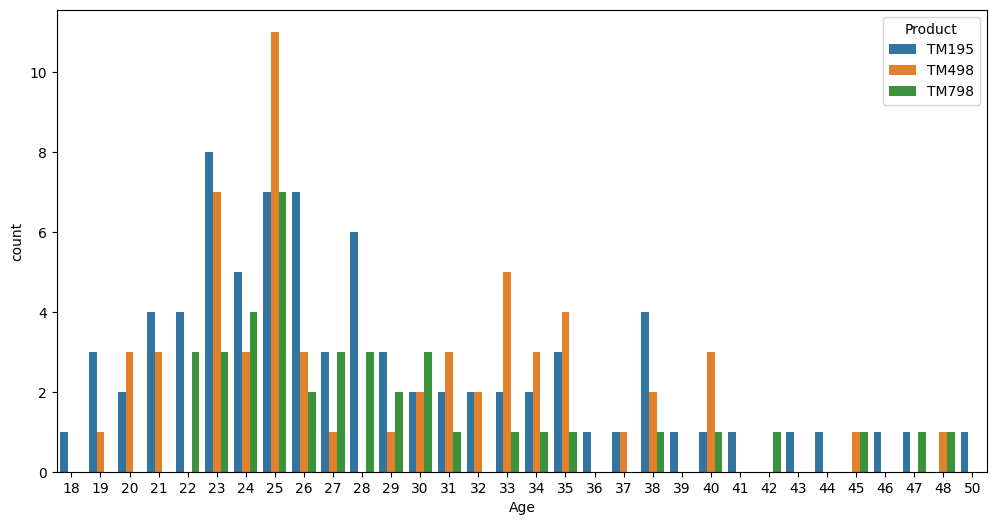

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, x = 'Age', hue='Product' )

<Axes: xlabel='Product', ylabel='Age'>

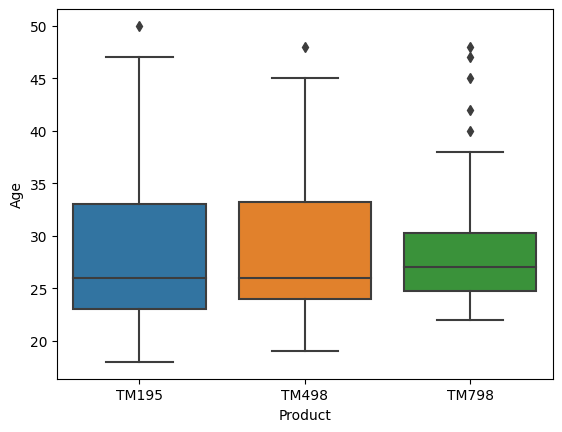

In [109]:
sns.boxplot(data = df, y = 'Age', x = 'Product')

<Axes: xlabel='Product', ylabel='Income'>

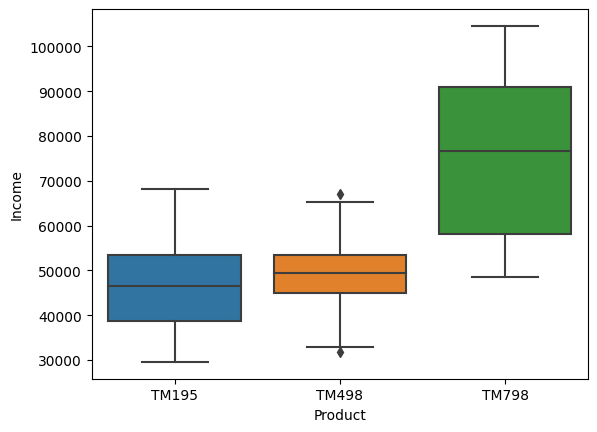

In [110]:
sns.boxplot(data = df, y = 'Income', x = 'Product')

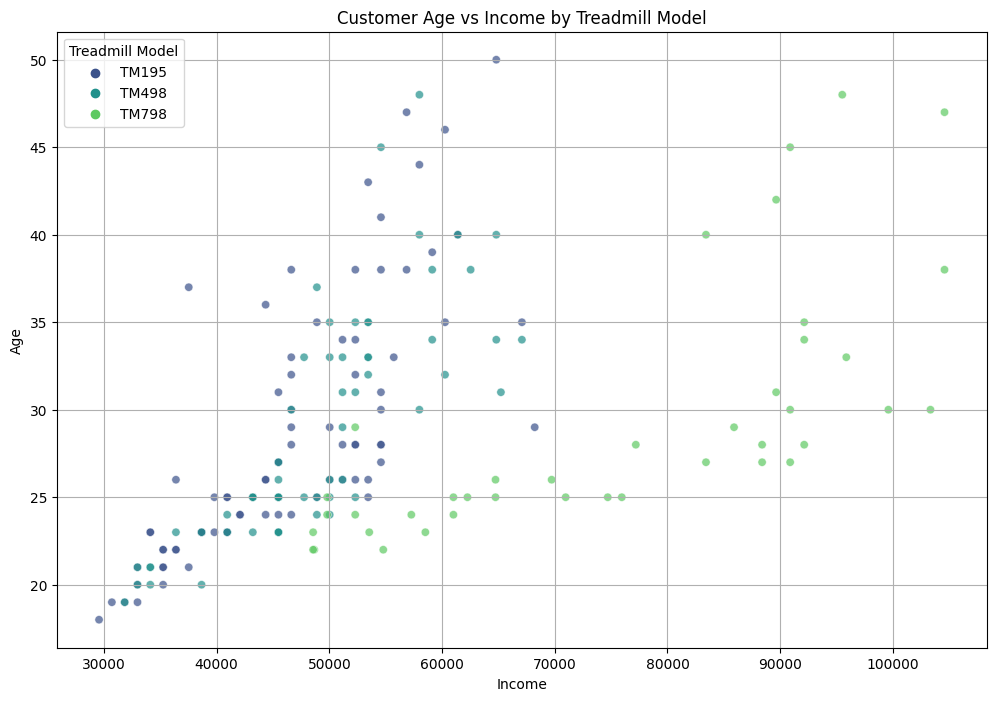

In [112]:
# Scatter Plot for Age vs Income by Treadmill Model

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Age', hue='Product', palette='viridis', alpha=0.7)
plt.title('Customer Age vs Income by Treadmill Model')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend(title='Treadmill Model')
plt.grid(True)
plt.show()

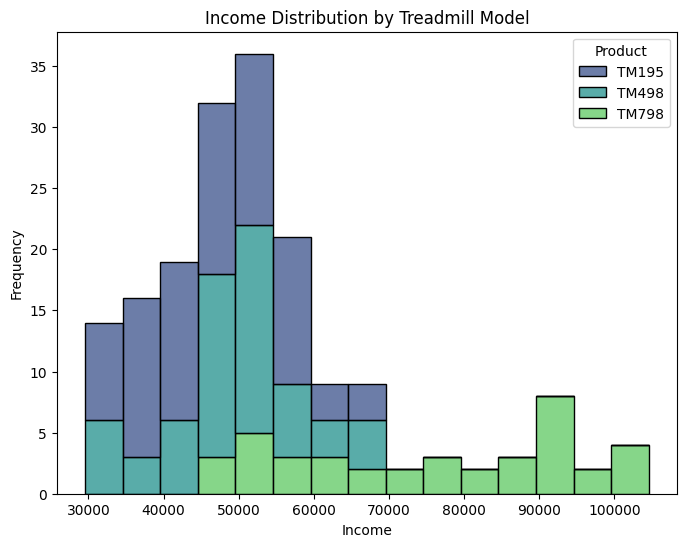

In [113]:
# Histogram of Income Distribution by Product

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', hue='Product', multiple='stack', palette='viridis')
plt.title('Income Distribution by Treadmill Model')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

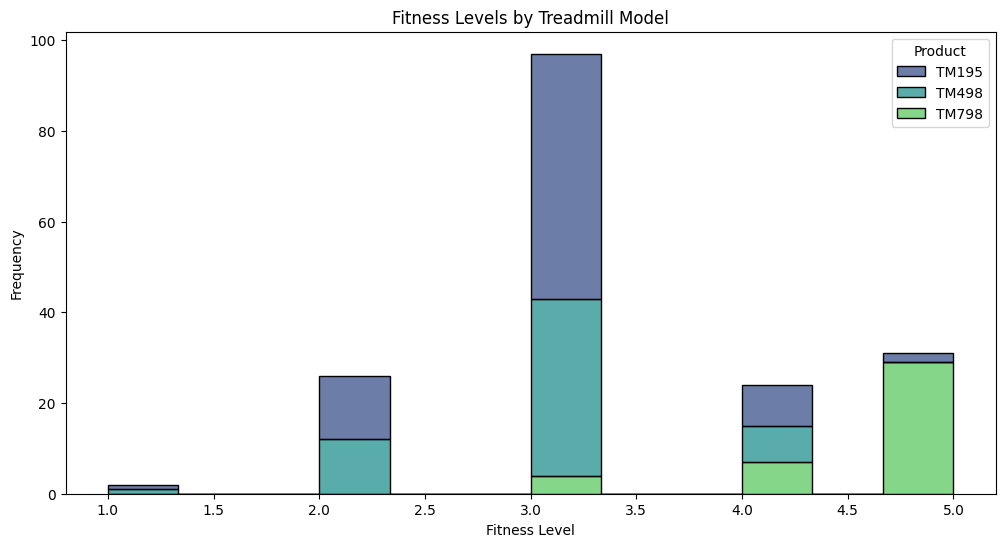

In [114]:
# Histogram of Fitness Levels by Product

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Fitness', hue='Product', multiple='stack', palette='viridis')
plt.title('Fitness Levels by Treadmill Model')
plt.xlabel('Fitness Level')
plt.ylabel('Frequency')
plt.show()

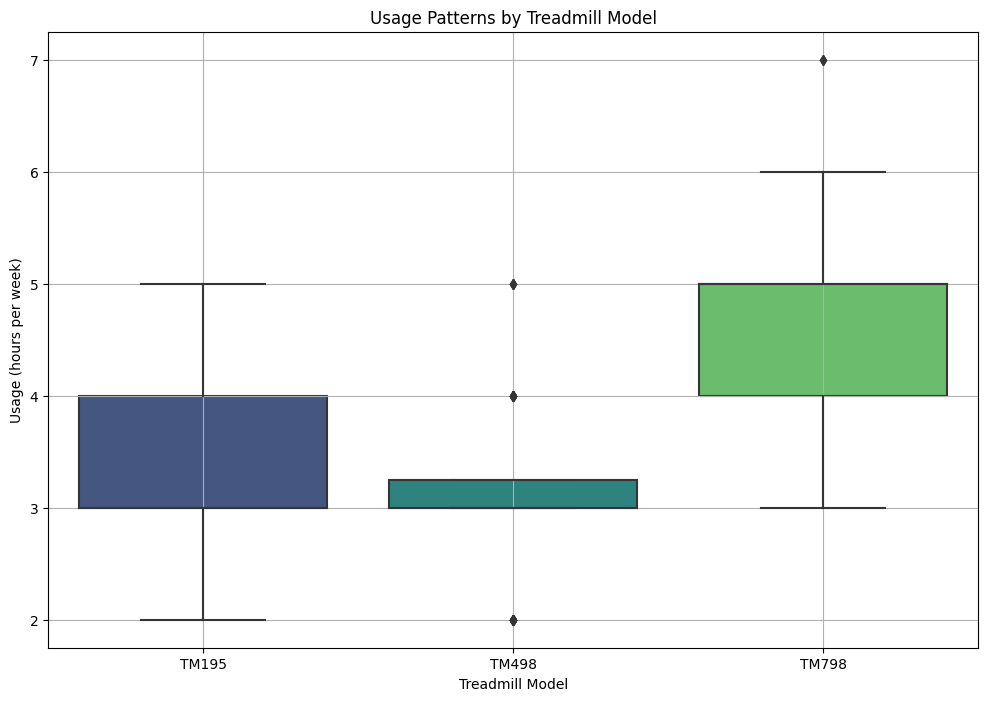

In [115]:
# Box Plot of Usage by Product

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Product', y='Usage', palette='viridis')
plt.title('Usage Patterns by Treadmill Model')
plt.xlabel('Treadmill Model')
plt.ylabel('Usage (hours per week)')
plt.grid(True)
plt.show()

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


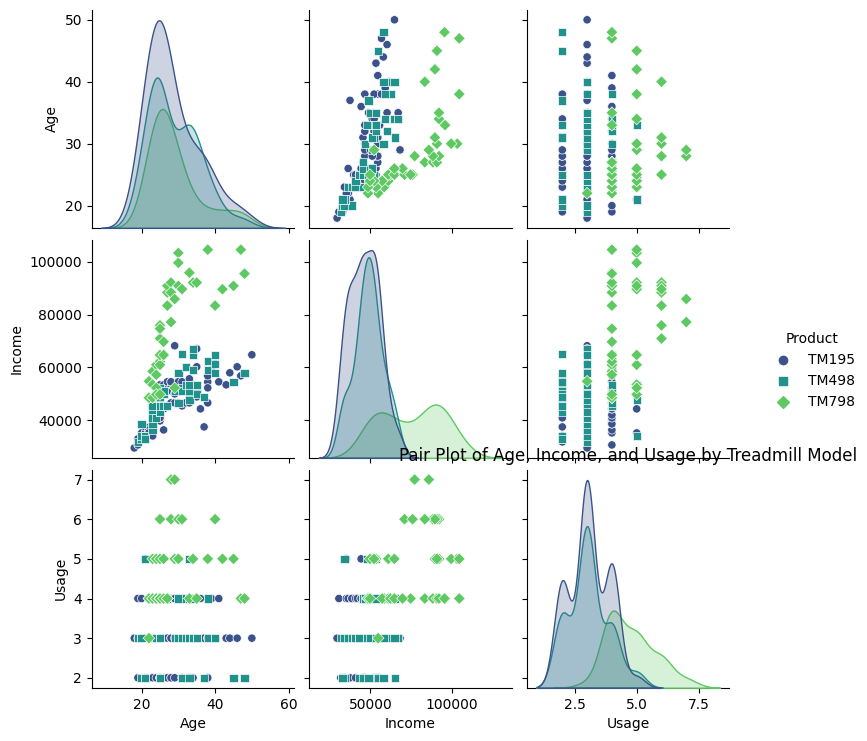

In [116]:
# Pair Plot of Age, Income, and Usage by Product

sns.pairplot(df, vars=['Age', 'Income', 'Usage'], hue='Product', palette='viridis', markers=['o', 's', 'D'])
plt.title('Pair Plot of Age, Income, and Usage by Treadmill Model')
plt.show()